# Importing Libraries

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Reading Dataset

In [10]:
df = pd.read_csv("assignment2.csv")

In [11]:
df.head()

,month,year,date,sp,spret,spi,nq,nqret,nqi,ret1,...,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
0,1,2000,2000-01-28,1394.459961,-0.052245,0,3940.350098,-0.032204,0,-0.048842,...,15280.093,115.1132,0,5.32,6.66,0.12,-4.82,-0.057438,0.387755,0.536171
1,1,2001,2001-01-28,1366.010010,0.034050,1,2772.729980,0.115404,1,0.027831,...,16174.974,123.1303,0,5.15,5.16,-0.62,-3.49,-0.394589,0.386702,0.539262
2,1,2002,2002-01-28,1130.199951,-0.015696,0,1934.030029,-0.008429,0,-0.013430,...,17495.016,129.8310,0,1.65,5.04,-0.04,-3.44,-0.220629,0.391564,0.455521
3,1,2003,2003-01-28,855.700012,-0.027797,0,1320.910034,-0.010992,0,-0.027668,...,16082.585,123.1346,0,1.17,4.05,-0.02,-2.20,-0.108401,0.408967,0.492795
4,1,2004,2004-01-28,1131.130005,0.017129,1,2066.149902,0.030856,1,0.017034,...,33007.516,112.7326,0,0.88,4.15,-0.02,-2.64,-0.366492,0.407824,0.555817


Statistical Summary of the dataset

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,254.0,6.574803,3.463005,1.000000,4.000000,7.000000,10.000000,12.000000
year,254.0,2009.051181,6.011299,1999.000000,2004.000000,2009.000000,2014.000000,2019.000000
sp,254.0,1563.003542,578.041216,735.090027,1161.837463,1362.545044,1938.237488,3230.780029
spret,254.0,0.004029,0.042093,-0.185636,-0.017958,0.009857,0.030592,0.102307
spi,254.0,0.618110,0.486809,0.000000,0.000000,1.000000,1.000000,1.000000
nq,254.0,3436.816421,1873.865610,1172.060059,2111.375000,2645.385009,4578.410034,8972.599609
nqret,254.0,0.005468,0.065082,-0.260088,-0.021215,0.012552,0.041740,0.198653
nqi,254.0,0.578740,0.494736,0.000000,0.000000,1.000000,1.000000,1.000000
ret1,254.0,0.005963,0.041001,-0.150996,-0.015998,0.010947,0.030839,0.100409
ind1,254.0,2121.816154,1017.340593,971.788000,1415.278750,1702.962500,2776.792000,5179.407000


#### Splitting Dataset
As we have to predict the rirections of two index including S&P500 and NASDQ, therefore, we need to split the Dataset into seperate dataframes against:
- S&P 500 index 
- NASDAQ index

In [13]:
df_sp = df.drop(['nq', 'nqret', 'nqi'], axis=1)
df_sp.head()

,month,year,date,sp,spret,spi,ret1,ind1,ret10,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
0,1,2000,2000-01-28,1394.459961,-0.052245,0,-0.048842,1755.710,0.073146,15280.093,115.1132,0,5.32,6.66,0.12,-4.82,-0.057438,0.387755,0.536171
1,1,2001,2001-01-28,1366.010010,0.034050,1,0.027831,1639.512,0.311924,16174.974,123.1303,0,5.15,5.16,-0.62,-3.49,-0.394589,0.386702,0.539262
2,1,2002,2002-01-28,1130.199951,-0.015696,0,-0.013430,1332.809,0.040486,17495.016,129.8310,0,1.65,5.04,-0.04,-3.44,-0.220629,0.391564,0.455521
3,1,2003,2003-01-28,855.700012,-0.027797,0,-0.027668,1019.547,0.012644,16082.585,123.1346,0,1.17,4.05,-0.02,-2.20,-0.108401,0.408967,0.492795
4,1,2004,2004-01-28,1131.130005,0.017129,1,0.017034,1340.248,0.081812,33007.516,112.7326,0,0.88,4.15,-0.02,-2.64,-0.366492,0.407824,0.555817


In [14]:
df_nq = df.drop(['sp', 'spret', 'spi'], axis=1)
df_nq.head()

,month,year,date,nq,nqret,nqi,ret1,ind1,ret10,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
0,1,2000,2000-01-28,3940.350098,-0.032204,0,-0.048842,1755.710,0.073146,15280.093,115.1132,0,5.32,6.66,0.12,-4.82,-0.057438,0.387755,0.536171
1,1,2001,2001-01-28,2772.729980,0.115404,1,0.027831,1639.512,0.311924,16174.974,123.1303,0,5.15,5.16,-0.62,-3.49,-0.394589,0.386702,0.539262
2,1,2002,2002-01-28,1934.030029,-0.008429,0,-0.013430,1332.809,0.040486,17495.016,129.8310,0,1.65,5.04,-0.04,-3.44,-0.220629,0.391564,0.455521
3,1,2003,2003-01-28,1320.910034,-0.010992,0,-0.027668,1019.547,0.012644,16082.585,123.1346,0,1.17,4.05,-0.02,-2.20,-0.108401,0.408967,0.492795
4,1,2004,2004-01-28,2066.149902,0.030856,1,0.017034,1340.248,0.081812,33007.516,112.7326,0,0.88,4.15,-0.02,-2.64,-0.366492,0.407824,0.555817


# Checking Correlations

Lets find correlation between attributes.

Ordinary Least Squares (OLS) regression requires that the correlation between the independent variables be sufficiently low. A rule of thumb here is to not include any pair of variables where the correlation is 0.7 or higher in absolute terms1. 

Before progressing with the modelling we should check whether our data includes any potentially problematic pairs of predictors.

In [15]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2430448088.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,month,year,sp,spret,spi,nq,nqret,nqi,ret1,ind1,ret10,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
month,1.00,-0.01,0.03,0.04,0.09,0.03,0.04,0.08,0.06,0.04,-0.05,0.02,0.00,-0.02,-0.02,-0.05,-0.07,0.05,-0.27,0.03,0.05
year,-0.01,1.00,0.79,0.11,0.16,0.77,0.09,0.16,0.13,0.82,-0.03,0.94,-0.03,-0.17,-0.58,-0.88,0.10,0.87,-0.09,0.95,0.48
sp,0.03,0.79,1.00,0.13,0.17,0.98,0.10,0.17,0.14,1.00,-0.02,0.90,0.38,-0.26,-0.10,-0.51,0.11,0.51,-0.05,0.70,0.49
spret,0.04,0.11,0.13,1.00,0.77,0.13,0.85,0.70,0.99,0.12,0.75,0.15,-0.08,-0.18,-0.08,-0.11,0.14,0.16,0.02,0.05,0.06
spi,0.09,0.16,0.17,0.77,1.00,0.16,0.67,0.76,0.77,0.17,0.58,0.21,-0.03,-0.12,-0.08,-0.15,0.08,0.18,-0.05,0.15,0.07
nq,0.03,0.77,0.98,0.13,0.16,1.00,0.11,0.17,0.14,0.99,-0.01,0.87,0.40,-0.27,-0.10,-0.50,0.15,0.50,-0.06,0.67,0.44
nqret,0.04,0.09,0.10,0.85,0.67,0.11,1.00,0.74,0.87,0.09,0.77,0.12,-0.09,-0.09,-0.11,-0.10,0.14,0.14,-0.03,0.07,0.02
nqi,0.08,0.16,0.17,0.70,0.76,0.17,0.74,1.00,0.72,0.17,0.59,0.18,-0.03,-0.04,-0.13,-0.16,0.03,0.19,-0.06,0.15,0.00
ret1,0.06,0.13,0.14,0.99,0.77,0.14,0.87,0.72,1.00,0.13,0.72,0.17,-0.09,-0.17,-0.09,-0.13,0.12,0.17,0.01,0.08,0.07
ind1,0.04,0.82,1.00,0.12,0.17,0.99,0.09,0.17,0.13,1.00,-0.03,0.91,0.38,-0.24,-0.15,-0.56,0.11,0.56,-0.06,0.73,0.46


<AxesSubplot:>

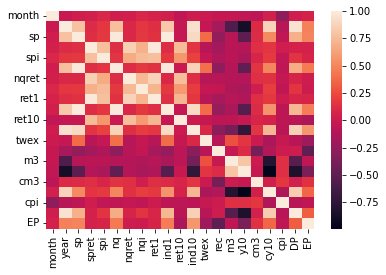

In [16]:
sb.heatmap(corr)

In [17]:
corr = df_sp.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\990015589.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,month,year,sp,spret,spi,ret1,ind1,ret10,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
month,1.00,-0.01,0.03,0.04,0.09,0.06,0.04,-0.05,0.02,0.00,-0.02,-0.02,-0.05,-0.07,0.05,-0.27,0.03,0.05
year,-0.01,1.00,0.79,0.11,0.16,0.13,0.82,-0.03,0.94,-0.03,-0.17,-0.58,-0.88,0.10,0.87,-0.09,0.95,0.48
sp,0.03,0.79,1.00,0.13,0.17,0.14,1.00,-0.02,0.90,0.38,-0.26,-0.10,-0.51,0.11,0.51,-0.05,0.70,0.49
spret,0.04,0.11,0.13,1.00,0.77,0.99,0.12,0.75,0.15,-0.08,-0.18,-0.08,-0.11,0.14,0.16,0.02,0.05,0.06
spi,0.09,0.16,0.17,0.77,1.00,0.77,0.17,0.58,0.21,-0.03,-0.12,-0.08,-0.15,0.08,0.18,-0.05,0.15,0.07
ret1,0.06,0.13,0.14,0.99,0.77,1.00,0.13,0.72,0.17,-0.09,-0.17,-0.09,-0.13,0.12,0.17,0.01,0.08,0.07
ind1,0.04,0.82,1.00,0.12,0.17,0.13,1.00,-0.03,0.91,0.38,-0.24,-0.15,-0.56,0.11,0.56,-0.06,0.73,0.46
ret10,-0.05,-0.03,-0.02,0.75,0.58,0.72,-0.03,1.00,-0.00,-0.02,-0.07,-0.06,-0.01,0.08,0.06,-0.06,-0.08,-0.14
ind10,0.02,0.94,0.90,0.15,0.21,0.17,0.91,-0.00,1.00,0.09,-0.29,-0.40,-0.73,0.16,0.73,-0.08,0.86,0.57
twex,0.00,-0.03,0.38,-0.08,-0.03,-0.09,0.38,-0.02,0.09,1.00,-0.09,0.27,0.15,0.00,-0.15,-0.02,-0.09,-0.20


In [18]:
corr = df_nq.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\2534133469.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,month,year,nq,nqret,nqi,ret1,ind1,ret10,ind10,twex,rec,m3,y10,cm3,cy10,cpi,DP,EP
month,1.00,-0.01,0.03,0.04,0.08,0.06,0.04,-0.05,0.02,0.00,-0.02,-0.02,-0.05,-0.07,0.05,-0.27,0.03,0.05
year,-0.01,1.00,0.77,0.09,0.16,0.13,0.82,-0.03,0.94,-0.03,-0.17,-0.58,-0.88,0.10,0.87,-0.09,0.95,0.48
nq,0.03,0.77,1.00,0.11,0.17,0.14,0.99,-0.01,0.87,0.40,-0.27,-0.10,-0.50,0.15,0.50,-0.06,0.67,0.44
nqret,0.04,0.09,0.11,1.00,0.74,0.87,0.09,0.77,0.12,-0.09,-0.09,-0.11,-0.10,0.14,0.14,-0.03,0.07,0.02
nqi,0.08,0.16,0.17,0.74,1.00,0.72,0.17,0.59,0.18,-0.03,-0.04,-0.13,-0.16,0.03,0.19,-0.06,0.15,0.00
ret1,0.06,0.13,0.14,0.87,0.72,1.00,0.13,0.72,0.17,-0.09,-0.17,-0.09,-0.13,0.12,0.17,0.01,0.08,0.07
ind1,0.04,0.82,0.99,0.09,0.17,0.13,1.00,-0.03,0.91,0.38,-0.24,-0.15,-0.56,0.11,0.56,-0.06,0.73,0.46
ret10,-0.05,-0.03,-0.01,0.77,0.59,0.72,-0.03,1.00,-0.00,-0.02,-0.07,-0.06,-0.01,0.08,0.06,-0.06,-0.08,-0.14
ind10,0.02,0.94,0.87,0.12,0.18,0.17,0.91,-0.00,1.00,0.09,-0.29,-0.40,-0.73,0.16,0.73,-0.08,0.86,0.57
twex,0.00,-0.03,0.40,-0.09,-0.03,-0.09,0.38,-0.02,0.09,1.00,-0.09,0.27,0.15,0.00,-0.15,-0.02,-0.09,-0.20


Note: we have seen that both SP500 (sp) and NASDAQ (nq) indes have high correlation with ind1, ind10, and DP predictor attributes.

#### Which variables are correlated with the return on the S&P500 index?
Correlation with SP500 index (spret):
- spi (0.77)
- ret1 (0.99)
- ret10 (0.75)

#### Which variables are correlated with the return on the NASDAQ index?
Correlation with NASDAQ index (nqret):
- nqi (0.74)
- ret1 (0.87)
- ret10 (0.77)

# Prediction

Now, Let's look at prediction. 

As, we want to find out how the two indices flactuate in the next month given what we know today by using logit and probit regressions, and Machine learning classification.

So, Let's first shift our dependent variable 1 backwards to get the correct alignment

The first task is to create the dummy for the direction of the sp500 index

In [11]:
df_sp['spi1'] = df_sp['spi'].shift(-1)

We drop the final observation because it is not possible to find the direction after the dataset ends

In [12]:
dfa_sp=df_sp.drop(df_sp.index[253])

In [13]:
#dfa_sp.head()

Similarly lets do it for NASDQA Index dataset

In [14]:
df_nq['nqi1'] = df_nq['nqi'].shift(-1)

In [15]:
dfa_nq=df_nq.drop(df_nq.index[253])

# Logit Regression

Let us define our first X matrix and also tell Python that the output should be the newly create indicator

In [16]:
X1_sp = dfa_sp[['m3','y10','rec']] #predictors
Y_sp = dfa_sp['spi1']   # dependent variable

X1_sp = sm.add_constant(X1_sp)
lmod1_sp = sm.Logit(Y_sp,X1_sp).fit()
lmod1_sp.summary()

Optimization terminated successfully.
         Current function value: 0.649314
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   spi1   No. Observations:                  253
Model:                          Logit   Df Residuals:                      249
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.02181
Time:                        23:07:31   Log-Likelihood:                -164.28
converged:                       True   LL-Null:                       -167.94
Covariance Type:            nonrobust   LLR p-value:                   0.06220
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3027      0.486      2.680      0.007       0.350       2.255
m3            -0.0635      0.121     -0.526      0.599      -0.300       0.173
y10           -0.1928      0.176     -1.095      0.273      -0.538       0.152
rec           -0.0589      0.427     -0.138      0.890      -0.895       0.777
==============================================================================
"""

Similarly for NASDAQ Index

In [17]:
X1_nq = dfa_nq[['m3','y10','rec']] #predictors
Y_nq = dfa_nq['nqi1']   # dependent variable

X1_nq = sm.add_constant(X1_nq)
lmod1_nq = sm.Logit(Y_nq,X1_nq).fit()
lmod1_nq.summary()

Optimization terminated successfully.
         Current function value: 0.660268
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   nqi1   No. Observations:                  253
Model:                          Logit   Df Residuals:                      249
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.02896
Time:                        23:07:33   Log-Likelihood:                -167.05
converged:                       True   LL-Null:                       -172.03
Covariance Type:            nonrobust   LLR p-value:                   0.01888
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5900      0.486      3.273      0.001       0.638       2.542
m3             0.0627      0.120      0.524      0.600      -0.172       0.297
y10           -0.3866      0.175     -2.205      0.027      -0.730      -0.043
rec            0.0531      0.422      0.126      0.900      -0.774       0.880
==============================================================================
"""

Results indicate that the logit regression model for NASDAQ index gives current function value 0.6602 and for SP500 its value is 0.6493

### Confusion matrix

Let us now construct the confusion matrix for this model

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_pred_sp = lmod1_sp.predict(X1_sp)
y_pred2_sp = np.where(y_pred_sp>0.5,1,0)

logcm_sp = confusion_matrix(Y_sp,y_pred2_sp)
logcm_sp

array([[ 13,  83],
       [  9, 148]], dtype=int64)

We can see that the model is predicting that most of the periods will see a rise in the S&P 1000 index. Of the true rises, the bottom row of the matrix, we see 148 of the 157 correctly predicted. However, when the index actually fell the model only predicts a fall for 13 of the 96 cases.

The overall prediction accuracy can be calculated simply from python as follows:

In [20]:
# (13+148)/(13+83+9+148)
 
# or
  
logcma_sp = (logcm_sp[0,0]+logcm_sp[1,1])/len(Y_sp)
logcma_sp

0.6363636363636364

Our Logit model has a prediction accuracy of 63.6% for S&P500 index

Let's Check this for NASDAQ index

In [21]:
y_pred_nq = lmod1_nq.predict(X1_nq)
y_pred2_nq = np.where(y_pred_nq>0.5,1,0)

logcm_nq = confusion_matrix(Y_nq,y_pred2_nq)
logcm_nq

array([[ 30,  76],
       [ 26, 121]], dtype=int64)

In [24]:
# (30+121)/(30+76+26+121)

logcma_nq = (logcm_nq[0,0]+logcm_nq[1,1])/len(Y_nq)
logcma_nq

0.5968379446640316

However, Our Logit model has a prediction accuracy of 59.6% for NASDAQ index

# Training & Testing the Logit Model

Lets import random package to set seed which will ensure that everyone gets the same results

In [25]:
import random
random.seed(584)

In [26]:
# Let's define the X and Y

X_sp = dfa_sp[['ret1','ret10','m3','y10','cpi','EP','DP']]
Y_sp = dfa_sp['spi1']
X_sp = sm.add_constant(X_sp)

In [27]:
# import train test split
from sklearn.model_selection import train_test_split

In [28]:
X_train_sp, X_test_sp, Y_train_sp, Y_test_sp = train_test_split(X_sp, Y_sp, test_size=0.2)

In [29]:
lmod01_sp = sm.Logit(Y_train_sp,X_train_sp).fit()

y_pred01_sp = lmod01_sp.predict(X_test_sp)
y_pred012_sp = np.where(y_pred01_sp>0.5,1,0)

logcm01_sp = confusion_matrix(Y_test_sp,y_pred012_sp)
logcm01_sp

Optimization terminated successfully.
         Current function value: 0.644256
         Iterations 5


array([[ 3, 15],
       [ 7, 26]], dtype=int64)

This confusion matrix again shows that there are more predictions of 1 than 0. 

In [30]:
logcm01a_sp = (logcm01_sp[0,0]+logcm01_sp[1,1])/len(Y_test_sp)
logcm01a_sp

0.5686274509803921

Similarily for NASDAQ Index

In [31]:
# Let's define the X and Y

X_nq = dfa_nq[['ret1','ret10','m3','y10','cpi','EP','DP']]
Y_nq = dfa_nq['nqi1']
X_nq = sm.add_constant(X_nq)

In [32]:
X_train_nq, X_test_nq, Y_train_nq, Y_test_nq = train_test_split(X_nq, Y_nq, test_size=0.2)

lmod01_nq = sm.Logit(Y_train_nq,X_train_nq).fit()

y_pred01_nq = lmod01_nq.predict(X_test_nq)
y_pred012_nq = np.where(y_pred01_nq>0.5,1,0)

logcm01_nq = confusion_matrix(Y_test_nq,y_pred012_nq)
logcm01_nq

Optimization terminated successfully.
         Current function value: 0.659585
         Iterations 5


array([[ 5,  6],
       [12, 28]], dtype=int64)

In [33]:
logcm01a_nq = (logcm01_nq[0,0]+logcm01_nq[1,1])/len(Y_test_nq)
logcm01a_nq

0.6470588235294118

The models are producing accuracy of 58.86% and 54.90% for S&P500 and NASDAQ index respectivdly.

# Stepwise Selection for Logit

The first variable to be excluded is **ret1**

In [49]:
# for S&P 500 index
X_train02_sp = X_train_sp[['const','ret10','m3','y10','cpi','EP','DP']]
X_test02_sp = X_test_sp[['const','ret10','m3','y10','cpi','EP','DP']]
lmod02 = sm.Logit(Y_train_sp,X_train02_sp).fit()

y_pred02 = lmod02.predict(X_test02_sp)
y_pred022 = np.where(y_pred02>0.5,1,0)

logcm02 = confusion_matrix(Y_test_sp,y_pred022)

logcm02a_sp = (logcm02[0,0]+logcm02[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm02a_sp, '\n')


# for NASDAQ index
X_train02_nq = X_train_nq[['const','ret10','m3','y10','cpi','EP','DP']]
X_test02_nq = X_test_nq[['const','ret10','m3','y10','cpi','EP','DP']]
lmod02 = sm.Logit(Y_train_nq,X_train02_nq).fit()

y_pred02 = lmod02.predict(X_test02_sp)
y_pred022 = np.where(y_pred02>0.5,1,0)

logcm02 = confusion_matrix(Y_test_sp,y_pred022)

logcm02a_nq = (logcm02[0,0]+logcm02[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm02a_nq)

Optimization terminated successfully.
         Current function value: 0.646643
         Iterations 5
Accuracy for S&P 500 Index:  0.6470588235294118 

Optimization terminated successfully.
         Current function value: 0.659734
         Iterations 5
Accuracy for NASDAQ Index :  0.5882352941176471


The first variable to be excluded is **ret10**

In [50]:
# for S&P 500 index
X_train03_sp = X_train_sp[['const','ret1','m3','y10','cpi','EP','DP']]
X_test03_sp = X_test_sp[['const','ret1','m3','y10','cpi','EP','DP']]
lmod03 = sm.Logit(Y_train_sp,X_train03_sp).fit()

y_pred03 = lmod03.predict(X_test03_sp)
y_pred032 = np.where(y_pred03>0.5,1,0)

logcm03 = confusion_matrix(Y_test_sp,y_pred032)

logcm03a_sp = (logcm03[0,0]+logcm03[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm03a_sp, '\n')


# for NASDAQ index
X_train03_nq = X_train_nq[['const','ret1','m3','y10','cpi','EP','DP']]
X_test03_nq = X_test_nq[['const','ret1','m3','y10','cpi','EP','DP']]
lmod03 = sm.Logit(Y_train_nq,X_train03_nq).fit()

y_pred03 = lmod03.predict(X_test03_sp)
y_pred032 = np.where(y_pred03>0.5,1,0)

logcm03 = confusion_matrix(Y_test_sp,y_pred032)

logcm03a_nq = (logcm03[0,0]+logcm03[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm03a_nq)

Optimization terminated successfully.
         Current function value: 0.645283
         Iterations 5
Accuracy for S&P 500 Index:  0.6078431372549019 

Optimization terminated successfully.
         Current function value: 0.661931
         Iterations 5
Accuracy for NASDAQ Index :  0.5490196078431373


I Have noticed that Without ret10 the prediction accuracy has fallen to 60.78% in the case of S&P 500 index and similarly, its fallen to 54.90% in the case of NASDAQ index. 

Thus, Removing ret10 at this stage is not a good idea.

We next try the model without **m3**

In [51]:
# for S&P 500 index
X_train04_sp = X_train_sp[['const','ret1','ret10','y10','cpi','EP','DP']]
X_test04_sp = X_test_sp[['const','ret1','ret10','y10','cpi','EP','DP']]
lmod04 = sm.Logit(Y_train_sp,X_train04_sp).fit()

y_pred04 = lmod04.predict(X_test04_sp)
y_pred042 = np.where(y_pred04>0.5,1,0)

logcm04 = confusion_matrix(Y_test_sp,y_pred042)

logcm04a_sp = (logcm04[0,0]+logcm04[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm04a_sp, '\n')


# for NASDAQ index
X_train04_nq = X_train_nq[['const','ret1','ret10','y10','cpi','EP','DP']]
X_test04_nq = X_test_nq[['const','ret1','ret10','y10','cpi','EP','DP']]
lmod04 = sm.Logit(Y_train_nq,X_train04_nq).fit()

y_pred04 = lmod04.predict(X_test04_sp)
y_pred042 = np.where(y_pred04>0.5,1,0)

logcm04 = confusion_matrix(Y_test_sp,y_pred042)

logcm04a_nq = (logcm04[0,0]+logcm04[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm04a_nq)

Optimization terminated successfully.
         Current function value: 0.644428
         Iterations 5
Accuracy for S&P 500 Index:  0.5686274509803921 

Optimization terminated successfully.
         Current function value: 0.660762
         Iterations 5
Accuracy for NASDAQ Index :  0.5490196078431373


We next try the model without **y10**

In [52]:
# for S&P 500 index
X_train05_sp = X_train_sp[['const','ret1','ret10','m3','cpi','EP','DP']]
X_test05_sp = X_test_sp[['const','ret1','ret10','m3','cpi','EP','DP']]
lmod05 = sm.Logit(Y_train_sp,X_train05_sp).fit()

y_pred05 = lmod05.predict(X_test05_sp)
y_pred052 = np.where(y_pred05>0.5,1,0)

logcm05 = confusion_matrix(Y_test_sp,y_pred052)

logcm05a_sp = (logcm05[0,0]+logcm05[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm05a_sp, '\n')


# for NASDAQ index
X_train05_nq = X_train_nq[['const','ret1','ret10','m3','cpi','EP','DP']]
X_test05_nq = X_test_nq[['const','ret1','ret10','m3','cpi','EP','DP']]
lmod05 = sm.Logit(Y_train_nq,X_train05_nq).fit()

y_pred05 = lmod05.predict(X_test05_sp)
y_pred052 = np.where(y_pred05>0.5,1,0)

logcm05 = confusion_matrix(Y_test_sp,y_pred052)

logcm05a_nq = (logcm05[0,0]+logcm05[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm05a_nq)

Optimization terminated successfully.
         Current function value: 0.645868
         Iterations 5
Accuracy for S&P 500 Index:  0.5882352941176471 

Optimization terminated successfully.
         Current function value: 0.661561
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


We next try the model without **cpi**

In [53]:
# for S&P 500 index
X_train06_sp = X_train_sp[['const','ret1','ret10','m3','y10','EP','DP']]
X_test06_sp = X_test_sp[['const','ret1','ret10','m3','y10','EP','DP']]
lmod06 = sm.Logit(Y_train_sp,X_train06_sp).fit()

y_pred06 = lmod06.predict(X_test06_sp)
y_pred062 = np.where(y_pred06>0.5,1,0)

logcm06 = confusion_matrix(Y_test_sp,y_pred062)

logcm06a_sp = (logcm06[0,0]+logcm06[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm06a_sp, '\n')


# for NASDAQ index
X_train06_nq = X_train_nq[['const','ret1','ret10','m3','y10','EP','DP']]
X_test06_nq = X_test_nq[['const','ret1','ret10','m3','y10','EP','DP']]
lmod06 = sm.Logit(Y_train_nq,X_train06_nq).fit()

y_pred06 = lmod06.predict(X_test06_sp)
y_pred062 = np.where(y_pred06>0.5,1,0)

logcm06 = confusion_matrix(Y_test_sp,y_pred062)

logcm06a_nq = (logcm06[0,0]+logcm06[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm06a_nq)

Optimization terminated successfully.
         Current function value: 0.645063
         Iterations 5
Accuracy for S&P 500 Index:  0.5686274509803921 

Optimization terminated successfully.
         Current function value: 0.662420
         Iterations 5
Accuracy for NASDAQ Index :  0.6078431372549019


We next try the model without **EP**

In [54]:
# for S&P 500 index
X_train07_sp = X_train_sp[['const','ret1','ret10','m3','y10','cpi','DP']]
X_test07_sp = X_test_sp[['const','ret1','ret10','m3','y10','cpi','DP']]
lmod07 = sm.Logit(Y_train_sp,X_train07_sp).fit()

y_pred07 = lmod07.predict(X_test07_sp)
y_pred072 = np.where(y_pred07>0.5,1,0)

logcm07 = confusion_matrix(Y_test_sp,y_pred072)

logcm07a_sp = (logcm07[0,0]+logcm07[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm07a_sp, '\n')


# for NASDAQ index
X_train07_nq = X_train_nq[['const','ret1','ret10','m3','y10','cpi','DP']]
X_test07_nq = X_test_nq[['const','ret1','ret10','m3','y10','cpi','DP']]
lmod07 = sm.Logit(Y_train_nq,X_train07_nq).fit()

y_pred07 = lmod07.predict(X_test07_sp)
y_pred072 = np.where(y_pred07>0.5,1,0)

logcm07 = confusion_matrix(Y_test_sp,y_pred072)

logcm07a_nq = (logcm07[0,0]+logcm07[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm07a_nq)

Optimization terminated successfully.
         Current function value: 0.644263
         Iterations 5
Accuracy for S&P 500 Index:  0.5686274509803921 

Optimization terminated successfully.
         Current function value: 0.663616
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


We next try the model without **DP**

In [55]:
# for S&P 500 index
X_train08_sp = X_train_sp[['const','ret1','ret10','m3','y10','cpi','EP']]
X_test08_sp = X_test_sp[['const','ret1','ret10','m3','y10','cpi','EP']]
lmod08 = sm.Logit(Y_train_sp,X_train08_sp).fit()

y_pred08 = lmod08.predict(X_test08_sp)
y_pred082 = np.where(y_pred08>0.5,1,0)

logcm08 = confusion_matrix(Y_test_sp,y_pred082)

logcm08a_sp = (logcm08[0,0]+logcm08[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  logcm08a_sp, '\n')


# for NASDAQ index
X_train08_nq = X_train_nq[['const','ret1','ret10','m3','y10','cpi','EP']]
X_test08_nq = X_test_nq[['const','ret1','ret10','m3','y10','cpi','EP']]
lmod08 = sm.Logit(Y_train_nq,X_train08_nq).fit()

y_pred08 = lmod08.predict(X_test08_sp)
y_pred082 = np.where(y_pred08>0.5,1,0)

logcm08 = confusion_matrix(Y_test_sp,y_pred082)

logcm08a_nq = (logcm08[0,0]+logcm08[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  logcm08a_nq)

Optimization terminated successfully.
         Current function value: 0.644806
         Iterations 5
Accuracy for S&P 500 Index:  0.5882352941176471 

Optimization terminated successfully.
         Current function value: 0.661000
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


Following prediction accuracies FOR S & P 500 Index occur when the Logit model eliminates the variable named:

- with All 56.86 %
- ret1 64.70 %
- ret10 60.78 %
- m3 56.86 %
- y10 58.82 %
- cpi 56.86 %
- EP 56.86 %
- DP 58.82 %

Similarily, following prediction accuracies for NASDAQ Index occur when the Logit model eliminates the variable named:

- with All 64.70 %
- ret1 58.80 % 
- ret10 54.90 %
- m3 54.90 %
- y10 56.86 %
- cpi 60.78 %
- EP 56.86 %
- DP 56.86 %

for both the indeces, the maximum prediction accuries are obtained when **ret1** variable is ommitted.

# Probit Regression

In [ ]:
pmod01_sp = sm.Probit(Y_train_sp,X_train_sp).fit()

y_pred01_sp = pmod01_sp.predict(X_test_sp)
y_pred012_sp = np.where(y_pred01_sp>0.5,1,0)

procm01_sp = confusion_matrix(Y_test_sp,y_pred012_sp)
procm01_sp

In [ ]:
procm01a_sp = (procm01_sp[0,0]+procm01_sp[1,1])/len(Y_test_sp)
procm01a_sp

Similarly for NASDAQ Index

In [ ]:
pmod01_nq = sm.Probit(Y_train_nq,X_train_nq).fit()

y_pred01_nq = pmod01_nq.predict(X_test_nq)
y_pred012_nq = np.where(y_pred01_nq>0.5,1,0)

procm01_nq = confusion_matrix(Y_test_nq,y_pred012_nq)

procm01_nq

In [ ]:
procm01a_nq = (procm01_nq[0,0]+procm01_nq[1,1])/len(Y_test_nq)
procm01a_nq

# Stepwise Selection for Probit

Similarly Lets perform Stepwise Selection for Probit Reqgression

The first variable to be excluded is **ret1**

In [56]:
# for S&P 500 index
X_train02_sp = X_train_sp[['const','ret10','m3','y10','cpi','EP','DP']]
X_test02_sp = X_test_sp[['const','ret10','m3','y10','cpi','EP','DP']]
pmod02 = sm.Probit(Y_train_sp,X_train02_sp).fit()

y_pred02 = pmod02.predict(X_test02_sp)
y_pred022 = np.where(y_pred02>0.5,1,0)

procm02 = confusion_matrix(Y_test_sp,y_pred022)

procm02a_sp = (procm02[0,0]+procm02[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm02a_sp, '\n')


# for NASDAQ index
X_train02_nq = X_train_nq[['const','ret10','m3','y10','cpi','EP','DP']]
X_test02_nq = X_test_nq[['const','ret10','m3','y10','cpi','EP','DP']]
pmod02 = sm.Probit(Y_train_nq,X_train02_nq).fit()

y_pred02 = pmod02.predict(X_test02_sp)
y_pred022 = np.where(y_pred02>0.5,1,0)

procm02 = confusion_matrix(Y_test_sp,y_pred022)

procm02a_nq = (procm02[0,0]+procm02[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm02a_nq)


Optimization terminated successfully.
         Current function value: 0.646578
         Iterations 5
Accuracy for S&P 500 Index:  0.6470588235294118 

Optimization terminated successfully.
         Current function value: 0.659807
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


The first variable to be excluded is **ret10**

In [57]:

# for S&P 500 index
X_train03_sp = X_train_sp[['const','ret1','m3','y10','cpi','EP','DP']]
X_test03_sp = X_test_sp[['const','ret1','m3','y10','cpi','EP','DP']]
pmod03 = sm.Probit(Y_train_sp,X_train03_sp).fit()

y_pred03 = pmod03.predict(X_test03_sp)
y_pred032 = np.where(y_pred03>0.5,1,0)

procm03 = confusion_matrix(Y_test_sp,y_pred032)

procm03a_sp = (procm03[0,0]+procm03[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm03a_sp, '\n')


# for NASDAQ index
X_train03_nq = X_train_nq[['const','ret1','m3','y10','cpi','EP','DP']]
X_test03_nq = X_test_nq[['const','ret1','m3','y10','cpi','EP','DP']]
pmod03 = sm.Probit(Y_train_nq,X_train03_nq).fit()

y_pred03 = pmod03.predict(X_test03_sp)
y_pred032 = np.where(y_pred03>0.5,1,0)

procm03 = confusion_matrix(Y_test_sp,y_pred032)

procm03a_nq = (procm03[0,0]+procm03[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm03a_nq)


Optimization terminated successfully.
         Current function value: 0.645458
         Iterations 5
Accuracy for S&P 500 Index:  0.6078431372549019 

Optimization terminated successfully.
         Current function value: 0.662081
         Iterations 5
Accuracy for NASDAQ Index :  0.5490196078431373


I Have noticed that Without ret10 the prediction accuracy has fallen to 60.78% in the case of S&P 500 index and similarly, its fallen to 54.90% in the case of NASDAQ index. 

Thus, Removing ret10 at this stage is not a good idea.

We next try the model without **m3**

In [58]:

# for S&P 500 index
X_train04_sp = X_train_sp[['const','ret1','ret10','y10','cpi','EP','DP']]
X_test04_sp = X_test_sp[['const','ret1','ret10','y10','cpi','EP','DP']]
pmod04 = sm.Probit(Y_train_sp,X_train04_sp).fit()

y_pred04 = pmod04.predict(X_test04_sp)
y_pred042 = np.where(y_pred04>0.5,1,0)

procm04 = confusion_matrix(Y_test_sp,y_pred042)

procm04a_sp = (procm04[0,0]+procm04[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm04a_sp, '\n')


# for NASDAQ index
X_train04_nq = X_train_nq[['const','ret1','ret10','y10','cpi','EP','DP']]
X_test04_nq = X_test_nq[['const','ret1','ret10','y10','cpi','EP','DP']]
pmod04 = sm.Probit(Y_train_nq,X_train04_nq).fit()

y_pred04 = pmod04.predict(X_test04_sp)
y_pred042 = np.where(y_pred04>0.5,1,0)

procm04 = confusion_matrix(Y_test_sp,y_pred042)

procm04a_nq = (procm04[0,0]+procm04[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm04a_nq)


Optimization terminated successfully.
         Current function value: 0.644592
         Iterations 5
Accuracy for S&P 500 Index:  0.6078431372549019 

Optimization terminated successfully.
         Current function value: 0.660822
         Iterations 5
Accuracy for NASDAQ Index :  0.5490196078431373


We next try the model without **y10**

In [59]:
# for S&P 500 index
X_train05_sp = X_train_sp[['const','ret1','ret10','m3','cpi','EP','DP']]
X_test05_sp = X_test_sp[['const','ret1','ret10','m3','cpi','EP','DP']]
pmod05 = sm.Probit(Y_train_sp,X_train05_sp).fit()

y_pred05 = pmod05.predict(X_test05_sp)
y_pred052 = np.where(y_pred05>0.5,1,0)

procm05 = confusion_matrix(Y_test_sp,y_pred052)

procm05a_sp = (procm05[0,0]+procm05[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm05a_sp, '\n')


# for NASDAQ index
X_train05_nq = X_train_nq[['const','ret1','ret10','m3','cpi','EP','DP']]
X_test05_nq = X_test_nq[['const','ret1','ret10','m3','cpi','EP','DP']]
pmod05 = sm.Probit(Y_train_nq,X_train05_nq).fit()

y_pred05 = pmod05.predict(X_test05_sp)
y_pred052 = np.where(y_pred05>0.5,1,0)

procm05 = confusion_matrix(Y_test_sp,y_pred052)

procm05a_nq = (procm05[0,0]+procm05[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm05a_nq)


Optimization terminated successfully.
         Current function value: 0.646243
         Iterations 4
Accuracy for S&P 500 Index:  0.6078431372549019 

Optimization terminated successfully.
         Current function value: 0.661642
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


We next try the model without **cpi**

In [60]:
# for S&P 500 index
X_train06_sp = X_train_sp[['const','ret1','ret10','m3','y10','EP','DP']]
X_test06_sp = X_test_sp[['const','ret1','ret10','m3','y10','EP','DP']]
pmod06 = sm.Probit(Y_train_sp,X_train06_sp).fit()

y_pred06 = pmod06.predict(X_test06_sp)
y_pred062 = np.where(y_pred06>0.5,1,0)

procm06 = confusion_matrix(Y_test_sp,y_pred062)

procm06a_sp = (procm06[0,0]+procm06[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm06a_sp, '\n')


# for NASDAQ index
X_train06_nq = X_train_nq[['const','ret1','ret10','m3','y10','EP','DP']]
X_test06_nq = X_test_nq[['const','ret1','ret10','m3','y10','EP','DP']]
pmod06 = sm.Probit(Y_train_nq,X_train06_nq).fit()

y_pred06 = pmod06.predict(X_test06_sp)
y_pred062 = np.where(y_pred06>0.5,1,0)

procm06 = confusion_matrix(Y_test_sp,y_pred062)

procm06a_nq = (procm06[0,0]+procm06[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm06a_nq)


Optimization terminated successfully.
         Current function value: 0.645369
         Iterations 5
Accuracy for S&P 500 Index:  0.5686274509803921 

Optimization terminated successfully.
         Current function value: 0.662505
         Iterations 5
Accuracy for NASDAQ Index :  0.6078431372549019


We next try the model without **EP**

In [61]:
# for S&P 500 index
X_train07_sp = X_train_sp[['const','ret1','ret10','m3','y10','cpi','DP']]
X_test07_sp = X_test_sp[['const','ret1','ret10','m3','y10','cpi','DP']]
pmod07 = sm.Probit(Y_train_sp,X_train07_sp).fit()

y_pred07 = pmod07.predict(X_test07_sp)
y_pred072 = np.where(y_pred07>0.5,1,0)

procm07 = confusion_matrix(Y_test_sp,y_pred072)

procm07a_sp = (procm07[0,0]+procm07[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm07a_sp, '\n')


# for NASDAQ index
X_train07_nq = X_train_nq[['const','ret1','ret10','m3','y10','cpi','DP']]
X_test07_nq = X_test_nq[['const','ret1','ret10','m3','y10','cpi','DP']]
pmod07 = sm.Probit(Y_train_nq,X_train07_nq).fit()

y_pred07 = pmod07.predict(X_test07_sp)
y_pred072 = np.where(y_pred07>0.5,1,0)

procm07 = confusion_matrix(Y_test_sp,y_pred072)

procm07a_nq = (procm07[0,0]+procm07[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm07a_nq)


Optimization terminated successfully.
         Current function value: 0.644456
         Iterations 5
Accuracy for S&P 500 Index:  0.5882352941176471 

Optimization terminated successfully.
         Current function value: 0.663613
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


We next try the model without **DP**

In [62]:
 
# for S&P 500 index
X_train08_sp = X_train_sp[['const','ret1','ret10','m3','y10','cpi','EP']]
X_test08_sp = X_test_sp[['const','ret1','ret10','m3','y10','cpi','EP']]
pmod08 = sm.Probit(Y_train_sp,X_train08_sp).fit()

y_pred08 = pmod08.predict(X_test08_sp)
y_pred082 = np.where(y_pred08>0.5,1,0)

procm08 = confusion_matrix(Y_test_sp,y_pred082)

procm08a_sp = (procm08[0,0]+procm08[1,1])/len(Y_test_sp)
print('Accuracy for S&P 500 Index: ',  procm08a_sp, '\n')


# for NASDAQ index
X_train08_nq = X_train_nq[['const','ret1','ret10','m3','y10','cpi','EP']]
X_test08_nq = X_test_nq[['const','ret1','ret10','m3','y10','cpi','EP']]
pmod08 = sm.Probit(Y_train_nq,X_train08_nq).fit()

y_pred08 = pmod08.predict(X_test08_sp)
y_pred082 = np.where(y_pred08>0.5,1,0)

procm08 = confusion_matrix(Y_test_sp,y_pred082)

procm08a_nq = (procm08[0,0]+procm08[1,1])/len(Y_test_nq)
print('Accuracy for NASDAQ Index : ',  procm08a_nq)


Optimization terminated successfully.
         Current function value: 0.645090
         Iterations 5
Accuracy for S&P 500 Index:  0.5882352941176471 

Optimization terminated successfully.
         Current function value: 0.661116
         Iterations 5
Accuracy for NASDAQ Index :  0.5686274509803921


Following prediction accuracies for S & P 500 Index occur when the Probit model eliminates the variable named:

- with all 60.78 %
- ret1 64.70 %
- ret10 60.78 %
- m3 60.78 %
- y10 60.78 %
- cpi 56.86 %
- EP 58.82 %
- DP 58.82 %

Similarily, following prediction accuracies for NASDAQ Index occur when the probit model eliminates the variable named:

- with all 64.70 %
- ret1 56.86 % 
- ret10 54.90 %
- m3 54.90 %
- y10 56.86 %
- cpi 60.78 %
- EP 56.86 %
- DP 56.86 %

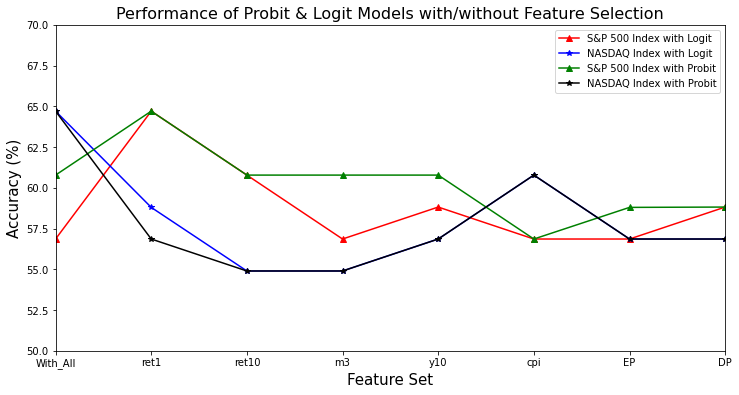

In [76]:
#  plotting the graph for performance of Probit & Logit model with different attibute set
import numpy as np
import matplotlib.pyplot as plt
Model = np.array(['With_All', 'ret1', 'ret10', 'm3', 'y10', 'cpi', 'EP', 'DP'])

Logit_SP500 = np.array([56.86, 64.70, 60.78, 56.86, 58.82, 56.86, 56.86, 58.82])
Logit_NASDAQ = np.array([64.70, 58.80, 54.90, 54.90, 56.86, 60.78, 56.86, 56.86])

Probit_SP500 = np.array([60.78, 64.70, 60.78, 60.78, 60.78, 56.86, 58.80, 58.82])
Probit_NASDAQ = np.array([64.70, 56.86, 54.90, 54.90, 56.86, 60.78, 56.86, 56.86])


plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(Model, Logit_SP500, 'r-^', label="S&P 500 Index with Logit")
plt.plot(Model, Logit_NASDAQ, 'b-*', label = "NASDAQ Index with Logit")
plt.plot(Model, Probit_SP500, 'g-^', label = "S&P 500 Index with Probit")
plt.plot(Model, Probit_NASDAQ, 'k-*', label = "NASDAQ Index with Probit")

plt.title('Performance of Probit & Logit Models with/without Feature Selection', fontsize = 16)
plt.xlim([0, 7])
plt.ylim([50, 70])
plt.xlabel('Feature Set', fontsize = 15)
plt.ylabel('Accuracy (%)', fontsize = 15)
plt.legend()

plt.show()

**Notice that both Logit and Probit models gives maximum prediction accuracy for S&P500 index when ret1 is ommitted.** 

**However, both Logit and Probit models gives maximum prediction accuracy for NASDAQ index when all the attributes are presented to the model.**

# Random Forest

In [63]:
# import Random Forest Classifier Funciton
from sklearn.ensemble import RandomForestClassifier as rf

The fitting of this model includes all of the variables in the dataset. We call this model rf1 as it is our first random forest.

In [64]:
rf1_sp = rf(n_estimators=1000, random_state=584)
#fitting model
rf1_sp.fit(X_train_sp, Y_train_sp)

#making predictions
predictions = rf1_sp.predict(X_test_sp)

# calculating error
errors = abs(predictions-Y_test_sp)
mae = np.mean(errors)
1-mae

0.5098039215686274

In [65]:
# Similarily for NASDAQ index
rf1_nq = rf(n_estimators=1000, random_state=584)
#fitting model
rf1_nq.fit(X_train_nq, Y_train_nq)

#making predictions
predictions = rf1_nq.predict(X_test_nq)

# calculating error
errors = abs(predictions-Y_test_nq)
mae = np.mean(errors)
1-mae

0.6666666666666667

The outcome here is the percentage of times that the model gets the prediction right. We can see that the correct prediction percentage is 64.70% & 54.90% for S&P500 and NASDAQ indeces, respectively.